# Find the ideal function 
### Programming with Python (DLMDSPWP01)

In this exercise we will create a script that finds the top 4 functions that matches a function that we will use as a training sample. 
The functions are defined in a bi-dimensional space. We will be using the Least Squares function to measure the deviation between functions and decide which is the best. 

This notebook is meant to be used as the documented version of the Python script *main.py*. **The main files containing the app are the Python scripts**.

Let's start the code importing the required dependencies and the datasets. 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In the main script we will be using a database using SQLite, but for the sake of simplicity in this time we will be importing the files using Pandas.

In [3]:
dir_path = "./datasets"
raw_df = []

# Import all CSV files in this order: ideal.csv, test.csv, train.csv
filenames = ["test.csv", "ideal.csv", "train.csv"]

for filename in filenames:
    file_path = os.path.join(dir_path, filename)
    if os.path.exists(file_path):
        data = pd.read_csv(file_path)
        raw_df.append(data)
    else:
        print(f"File not found: {file_path}")

Unit test idea 1: check that both columns have the same length
unit test 1.2: check order of the rows 
unit test idea 2: check for missing values
unit test idea 3: check that all values are numerical 
unit test idea 4: check that all values are sorted correctly in ascending order
unit test idea 5: check that all values in column X are the same through the three dataframes 


Now we need to loop through all pairs in both "ideal" and "train" datasets to calculate the **Least Squares Deviation Cost function**.
To do so, we will be using the following formula: 

$$
J(x) = \sum_{i=1}^{n} (y_i - (Ax)_i)^2
$$

Using the code snippet below, first we will be iterating through all the functions in the "ideal" dataset and then calculate the deviation between the pairs in one dataframe and the target functions in the "train" dataset. 

At the end of the iteration, we will save the function from "ideal" that obtained the minimum sum of squared deviation scores. 


In [4]:
train = raw_df[2]
ideal = raw_df[1]
test = raw_df[0]

res_data = []  # List to store the results

# Iterate through every column in train 
for col_train in train.iloc[:, 1:].columns:
    train_data = train[col_train].values
    ideal_data = ideal.iloc[:, 1:].values

    # Calculate the least squares deviation for all pairs
    deviations = np.sum((ideal_data - train_data[:, np.newaxis])**2, axis=0)

    # Find the index and value of the minimum deviation
    idx = np.argmin(deviations) + 1
    ls = deviations[idx - 1]  # Subtract 1 to get the correct index

    res_data.append([idx, ls])

# Create the DataFrame outside the loop and print
res = pd.DataFrame(res_data, columns=['index', 'ls'])
res

,index,ls
0,42,34.246594
1,41,35.601847
2,11,29.861830
3,48,31.963434


Now let's plot the functions that obtained the lowest deviation score 
to compare them visually to the target original functions in "train". We will be using Matplotlib to plot the functions in a 2D space. 

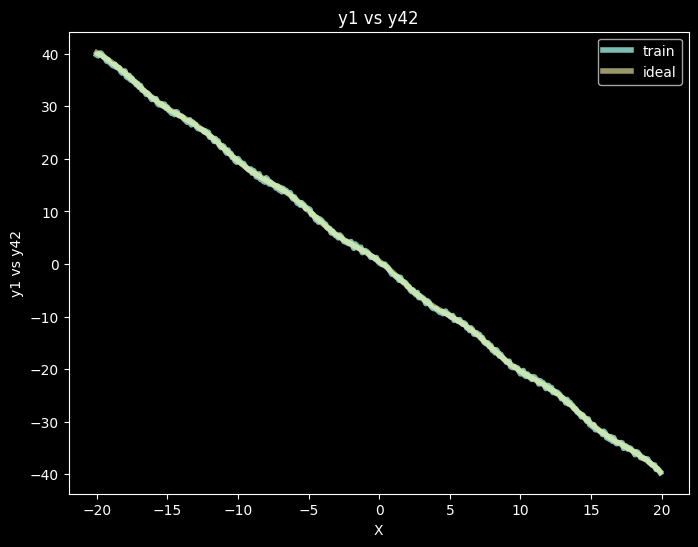

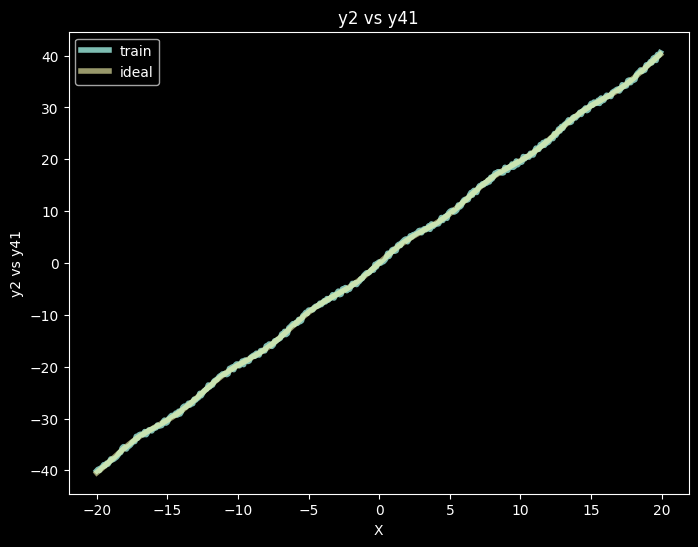

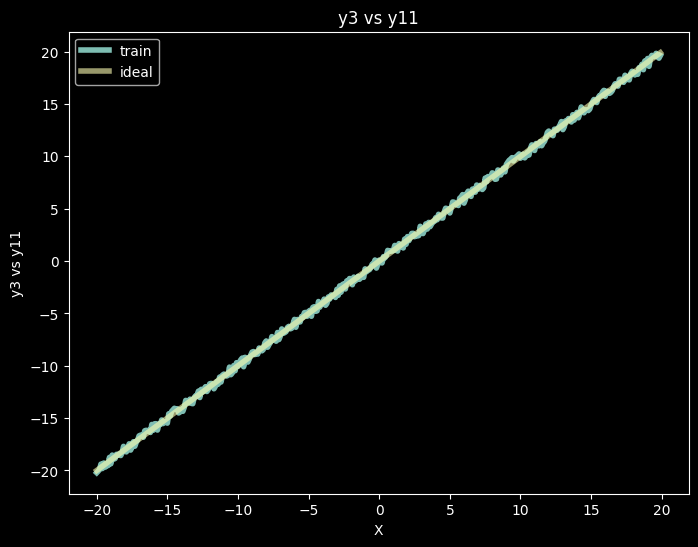

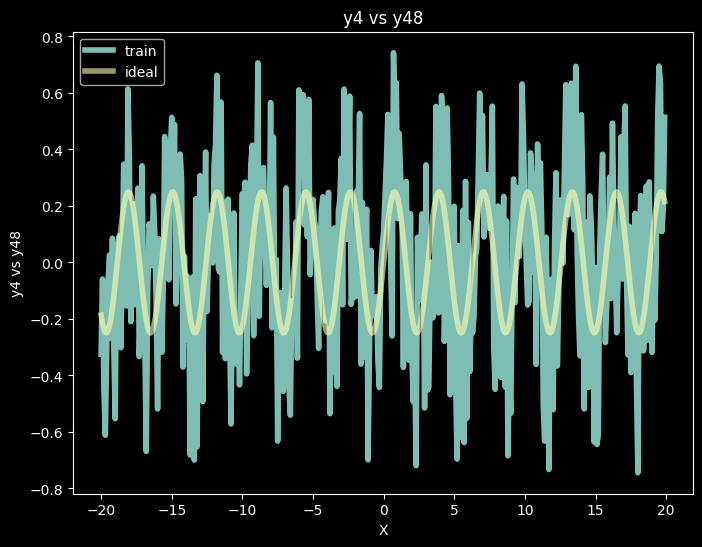

In [5]:
# Extract the X and Y data
x_train = train['x']
y_train = train[['y1', 'y2', 'y3', 'y4']]

x_ideal = ideal['x']
y_ideal = ideal[['y42', 'y41', 'y11', 'y48']]

# Create pairs of Y columns
y_column_pairs = [('y1', 'y42'), ('y2', 'y41'), ('y3', 'y11'), ('y4', 'y48')]

# Create a separate plot for each Y column pair
for pair in y_column_pairs:
    y_column_train, y_column_ideal = pair
    plt.figure(figsize=(8, 6))  # Create a new figure for each Y column pair
    plt.plot(x_train, y_train[y_column_train], label='train', linewidth=4, alpha=.9)
    plt.plot(x_ideal, y_ideal[y_column_ideal], label='ideal', linewidth=4, alpha=.6)
    plt.xlabel('X')
    plt.ylabel(f'{y_column_train} vs {y_column_ideal}')
    plt.legend()
    plt.title(f'{y_column_train} vs {y_column_ideal}')

plt.show()  # Show all the plots


In [6]:
# Create a new dataframe containing only the four ideal functions by order 
ideal_col_index = ['x'] + ["y" + str(int(idx)) for idx in res.iloc[:, 0]] 
ideal_four = ideal[ideal_col_index]
ideal_four

,x,y42,y41,y11,y48
0,-20.0,40.204040,-40.456474,-20.0,-0.186278
1,-19.9,40.048590,-40.233820,-19.9,-0.215690
2,-19.8,39.890660,-40.006836,-19.8,-0.236503
3,-19.7,39.729824,-39.775787,-19.7,-0.247887
4,-19.6,39.565693,-39.540980,-19.6,-0.249389
...,...,...,...,...,...
395,19.5,-38.602093,39.302770,19.5,0.240949
396,19.6,-38.834310,39.540980,19.6,0.249389
397,19.7,-39.070175,39.775787,19.7,0.247887
398,19.8,-39.309338,40.006836,19.8,0.236503


It seems like these four ideal functions fit the four functions from the training dataset quite well. 

The next step is to check whether any of those functions can fit the target function in the test dataset.

But before that, it seems like there is a mismatch between the number of rows in test and the rows in ideal. Let's run a sanity check this time, but we might want to add a unit test to check if the same issue happens in the future.  

Another issue is that there are duplicates in the data from test.csv. This time we will be keeping only the first value when there are more than one data point belonging to the same point in the X axis for further analysis will be required in the future. 

In [7]:
# Retrieve again the dataset
test = raw_df[0]

# Sort indeces in test dataset
test = test.sort_values(by='x', ascending=True).reset_index(drop=True)

# Remove duplicates in the axis X keeping only the first value
test = test.drop_duplicates(subset='x')

# Extract the values from the "x" column in the "ideal" DataFrame
common_x_values = ideal_four[ideal_four['x'].isin(test['x'])]['x']

# Filter both dataframes to these values 
test_trim = test[test['x'].isin(common_x_values)].reset_index(drop=True)
ideal_filtered = ideal_four[ideal_four['x'].isin(common_x_values)].reset_index(drop=True)
train_filtered = train[train['x'].isin(common_x_values)].reset_index(drop=True)

ideal_filtered

,x,y42,y41,y11,y48
0,-20.0,40.204040,-40.456474,-20.0,-0.186278
1,-19.8,39.890660,-40.006836,-19.8,-0.236503
2,-19.3,39.050125,-38.817684,-19.3,-0.195970
3,-19.2,38.869610,-38.571660,-19.2,-0.161224
4,-19.1,38.684402,-38.323917,-19.1,-0.120051
...,...,...,...,...,...
84,18.2,-36.001823,36.097584,18.2,-0.240830
85,18.7,-36.905582,37.325500,18.7,-0.073668
86,18.8,-37.100613,37.575233,18.8,-0.024737
87,18.9,-37.300636,37.825210,18.9,0.025179


We have trimmed the datasets to the X values they have in common and dropped the duplicates, so we can be sure that the result when calculating the least square deviation is not biased. 

Next we want to calculate the least square deviation between the four ideal functions and the test function just as we did in the previous step and keep track of the maximum deviation. What we want to check is whether the maximum deviation between the four ideal functions and the test function is always less than the deviation we found during the previous step  by more than factor sqrt(2)

In [28]:
test_data = [] 
idx = 1

# Define factor to check the deviation 
factor = np.sqrt(2)

for col in range(1, 5):
    # Calculate maximum deviation between ideal.csv and train.csv
    previous_dev = abs(ideal_filtered.iloc[:,col] - train_filtered.iloc[:,col]) ** 2
    previous_dev = previous_dev.max()
    
    # Calculate maximum deviation between test.csv and ideal.csv
    current_dev = abs(ideal_filtered.iloc[:,col] - test_trim.iloc[:,1]) ** 2
    current_dev = current_dev.max() 

    # Assign criterion to check deviations
    exceeds = current_dev > (previous_dev * factor)
    
    # Check and print results 
    results_map = np.where(exceeds, 'Exceeds criterion', 'Meets criterion')
    print('Results for ideal function ', ideal_col_index[idx],': ', results_map, sep='')
    idx += 1


Results for ideal function y42: Exceeds criterion
Results for ideal function y41: Exceeds criterion
Results for ideal function y11: Exceeds criterion
Results for ideal function y48: Exceeds criterion


None of the ideal functions could pass the test, which means that the maximum deviation between ideal and test function is always superior. 

Now let's display the final plot with the ideal functions and the test function to check visually the results. 

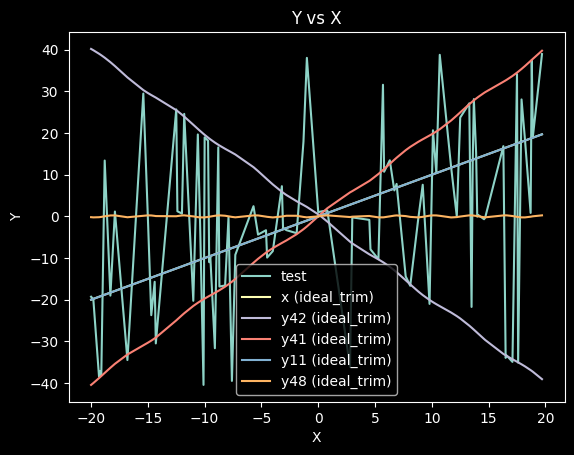

In [34]:
# Extract the X and Y data for "test"
x_test = test_trim['x']
y_test = test_trim['y']

# Extract the X and Y data for "ideal_trim" columns 'y42', 'y41', 'y11', and 'y48'
ideal_data = {col: ideal_filtered[col] for col in ideal_col_index}

# Create a new figure for the plot
plt.figure()

# Plot Y data for test
plt.plot(x_test, y_test, label='test')

# Plot Y data for each ideal_trim
for col, y_data in ideal_data.items():
    plt.plot(x_test, y_data, label=f'{col} (ideal_trim)')

# Setting labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Y vs X')

# Show the plot
plt.show()


In this final plot we can observe how the ideal functions can't fit the test function efficiently. In conclusion, we can say that none of provided the ideal functions would be a good option to fit the test data. 